In [1]:
%load_ext autoreload
%autoreload 2

from multicamera_acquisition.acquisition import refactor_acquire_video, AcquisitionLoop
from multicamera_acquisition.writer import NVC_Writer, FFMPEG_Writer
from multicamera_acquisition.interfaces.microcontroller import Microcontroller 
from multicamera_acquisition.interfaces.config import (
    partial_config_from_camera_list,
    create_full_camera_default_config,
)


In [2]:
# Run the func!
import logging

def reset_loggers():
    # Remove handlers from all loggers
    for logger in logging.Logger.manager.loggerDict.values():
        if isinstance(logger, logging.Logger):  # Guard against 'PlaceHolder' objects
            logger.handlers.clear()

    # Reset the root logger
    logging.getLogger().handlers.clear()

In [8]:
camera_list = [
    # {"name": "side3",  "brand": "basler", "id": "40332773", "gain": 6, "exposure": 1000},
    # {"name": "side4",  "brand": "basler", "id": "40347935", "gain": 6, "exposure": 1000},
    # {"name": "side2",  "brand": "basler", "id": "40347941", "gain": 6, "exposure": 1000},
    # {"name": "side1",  "brand": "basler", "id": "40347943", "gain": 6, "exposure": 1000},
    {"name": "top",    "brand": "basler", "id": "40393557", "gain": 6, "exposure": 1000},
    {"name": "bottom", "brand": "basler", "id": "40393560", "gain": 22, "exposure": 1000},
    # {"name": "azure_top",    "brand": "azure", "id": "000500221712", "subordinate_delay_off_master_usec": 0},
    {"name": "azure_bottom", "brand": "azure", "id": "000693321712", "subordinate_delay_off_master_usec": 0},    
]

# Set the trigger behavior
for camera in camera_list[:6]:
    camera["trigger_type"] = "microcontroller"

# Recording params
fps = 90
rec_time_s = 5
tmp_path = R'D:\Jonah\2023_12_26_6cam_testing\tmp'
logging_level = "INFO"

In [9]:
# Parse the "camera list" into a partial config
partial_new_config = partial_config_from_camera_list(camera_list)

# Add writer configs to each ir camera config
for camera_name in partial_new_config["cameras"].keys():
    if partial_new_config["cameras"][camera_name]["brand"] != "basler":
        continue
    ir_writer_config = NVC_Writer.default_writer_config(fps).copy()
    ir_writer_config["camera_name"] = camera_name
    partial_new_config["cameras"][camera_name]["writer"] = ir_writer_config

# Add writer config for the azure cameras
for camera_name in partial_new_config["cameras"].keys():
    if partial_new_config["cameras"][camera_name]["brand"] != "azure":
        continue
    az_ir_config = FFMPEG_Writer.default_writer_config(30, vid_type="ir", gpu=None).copy()
    az_dp_config = FFMPEG_Writer.default_writer_config(30, vid_type="depth", gpu=None).copy()
    az_ir_config["camera_name"] = camera_name
    az_dp_config["camera_name"] = camera_name
    partial_new_config["cameras"][camera_name]["writer"] = az_ir_config
    partial_new_config["cameras"][camera_name]["writer_depth"] = az_dp_config



In [17]:
# Create the full config, filling in defaults where necessary
full_config = create_full_camera_default_config(partial_new_config, fps)
full_config["globals"] = {}
full_config["globals"]["fps"] = fps
full_config["globals"]["microcontroller_required"] =True

# Set up the acquisition loop part of the config
acq_config = AcquisitionLoop.default_acq_loop_config().copy()
full_config["acq_loop"] = acq_config

# Set up the Microcontroller part of the config
full_config["microcontroller"] = Microcontroller.default_microcontroller_config()
full_config["microcontroller"]["top_camera_pins"] = [1, 5, 7, 9, 11]
full_config["microcontroller"]["bottom_camera_pins"] = [3]
full_config["microcontroller"]["bottom_camera_offset"] = -100

# Set up Azure part of the config
full_config["cameras"]["azure_bottom"]["subordinate_delay_off_master_usec"] = 0
# full_config["cameras"]["azure_top"]["subordinate_delay_off_master_usec"] = 160

In [18]:
logging_level = "DEBUG"

2024-01-22 22:53:04,711 - main_acq_logger - DEBUG - Set up main logger.
2024-01-22 22:53:04,718 - main_acq_logger - DEBUG - Started mp logging.
2024-01-22 22:53:04,718 - main_acq_logger - DEBUG - Have good save location D:\Jonah\2023_12_26_6cam_testing\tmp\24-01-22-22-53-04-718069
Logging level is set to DEBUG, but writer loglevel is not set to debug.  Setting writer loglevel to debug.
Logging level is set to DEBUG, but writer loglevel is not set to debug.  Setting writer loglevel to debug.
Logging level is set to DEBUG, but writer loglevel is not set to debug.  Setting writer loglevel to debug.
2024-01-22 22:53:07,746 - main_acq_logger - INFO - Finding microcontroller...
2024-01-22 22:53:08,778 - main_acq_logger - DEBUG - Starting child processes...
DEBUG:main_acq_logger:Starting child processes...
2024-01-22 22:53:08,794 - main_acq_logger - DEBUG - Waiting for acquisition loop (top) to initialize...
DEBUG:main_acq_logger:Waiting for acquisition loop (top) to initialize...
2024-01-22 

Recording Progress: 0%

2024-01-22 22:53:13,800 - bottom_writer - DEBUG - encoder dict ({'preset': 'P1', 'codec': 'h264', 's': '1920x1200', 'profile': 'high', 'fps': '90', 'multipass': '0', 'tuning_info': 'ultra_low_latency', 'fmt': 'YUV420', 'idrperiod': '256', 'gop': '30'}
2024-01-22 22:53:13,950 - top_writer - DEBUG - Pipe created
2024-01-22 22:53:13,950 - top_writer - DEBUG - Created new video pipe
2024-01-22 22:53:13,950 - bottom_writer - DEBUG - Pipe created
2024-01-22 22:53:13,950 - bottom_writer - DEBUG - Created new video pipe


Recording Progress: 20.0%

2024-01-22 22:53:18,763 - main_acq_logger - DEBUG - Finished recieved from microcontroller
DEBUG:main_acq_logger:Finished recieved from microcontroller
2024-01-22 22:53:18,763 - main_acq_logger - DEBUG - stopping acquisition loop (top)
DEBUG:main_acq_logger:stopping acquisition loop (top)
2024-01-22 22:53:18,763 - main_acq_logger - DEBUG - joining acquisition loop (top)
DEBUG:main_acq_logger:joining acquisition loop (top)
2024-01-22 22:53:18,781 - top_acqLoop - DEBUG - Received 450 many frames over 539 iterations, top
2024-01-22 22:53:18,781 - top_acqLoop - DEBUG - Writing empties to stop queue, top
2024-01-22 22:53:18,781 - top_acqLoop - DEBUG - Closing camera top
2024-01-22 22:53:18,781 - top_writer - DEBUG - Got stop signal
2024-01-22 22:53:18,781 - top_writer - DEBUG - Closing writer pipe (top)
2024-01-22 22:53:18,781 - top_writer - DEBUG - Creating muxer process for D:\Jonah\2023_12_26_6cam_testing\tmp\24-01-22-22-53-04-718069\24-01-22-22-53-04-718069.top.mp4
2024-01-22 22:53:18,7

Recording Progress: 100%

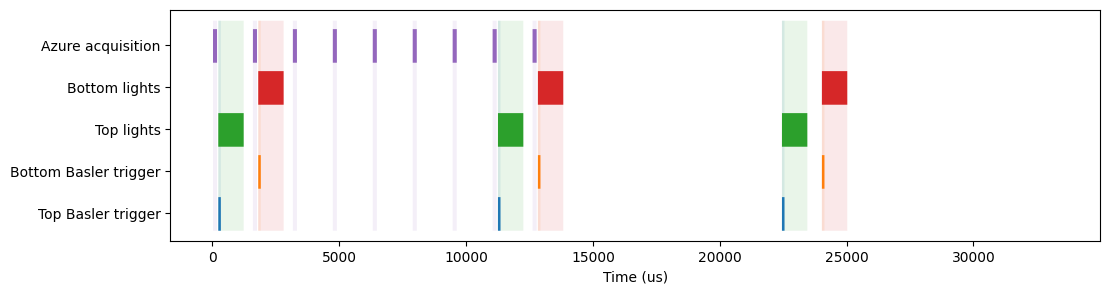

In [19]:
reset_loggers()

save_loc, first_video_file_name, full_config = refactor_acquire_video(
    tmp_path,
    full_config,
    recording_duration_s=rec_time_s,
    append_datetime=True,
    overwrite=False,
    logging_level=logging_level
)